In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

# 資料讀取

In [2]:
df = pd.read_csv("../data/tbrain_small.csv")
len(df)

22130579

In [21]:
final_df = pd.read_csv("../data/需預測的顧客名單及提交檔案範例.csv")
len(final_df["chid"].unique())

500000

In [3]:
df = df.drop(columns=['Unnamed: 0'])
df.columns

Index(['dt', 'chid', 'shop_tag', 'txn_cnt', 'txn_amt', 'domestic_offline_cnt',
       'domestic_online_cnt', 'overseas_offline_cnt', 'overseas_online_cnt',
       'domestic_offline_amt_pct', 'domestic_online_amt_pct',
       'overseas_offline_amt_pct', 'overseas_online_amt_pct', 'card_1_txn_cnt',
       'card_2_txn_cnt', 'card_3_txn_cnt', 'card_4_txn_cnt', 'card_5_txn_cnt',
       'card_6_txn_cnt', 'card_7_txn_cnt', 'card_8_txn_cnt', 'card_9_txn_cnt',
       'card_10_txn_cnt', 'card_11_txn_cnt', 'card_12_txn_cnt',
       'card_13_txn_cnt', 'card_14_txn_cnt', 'card_other_txn_cnt',
       'card_1_txn_amt_pct', 'card_2_txn_amt_pct', 'card_3_txn_amt_pct',
       'card_4_txn_amt_pct', 'card_5_txn_amt_pct', 'card_6_txn_amt_pct',
       'card_7_txn_amt_pct', 'card_8_txn_amt_pct', 'card_9_txn_amt_pct',
       'card_10_txn_amt_pct', 'card_11_txn_amt_pct', 'card_12_txn_amt_pct',
       'card_13_txn_amt_pct', 'card_14_txn_amt_pct', 'card_other_txn_amt_pct',
       'masts', 'educd', 'trdtp', 'naty

In [4]:
df.head()

,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,...,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
0,1,10267183,2,1,21701.307598,1,0,0,0,1.0,...,2.0,6.0,15.0,1.0,99.0,30.0,NaN,0.0,6.0,0
1,1,10115966,2,1,6698.199203,1,0,0,0,1.0,...,1.0,4.0,9.0,1.0,1.0,30.0,133000.939458,0.0,5.0,1
2,1,10484590,2,2,6693.510475,2,0,0,0,1.0,...,2.0,2.0,15.0,1.0,99.0,30.0,82728.103080,0.0,3.0,1
3,1,10079974,2,1,3271.025090,1,0,0,0,1.0,...,2.0,2.0,2.0,1.0,2.0,30.0,117920.305695,0.0,4.0,1
4,1,10233949,2,1,2829.165439,1,0,0,0,1.0,...,1.0,5.0,15.0,1.0,99.0,30.0,181351.200025,1.0,6.0,1


In [5]:
# traing data & testing data
df, test_df = train_test_split(df, test_size=0.2, random_state=66)

# EDA

篩選大部分為類別欄位： chid, shop_tag, txn_cnt, txn_amt, masts, educd, trdtp, naty, poscd, cuorg, gender_code, age, primary_card

In [63]:
df = df[["chid", "shop_tag", "txn_cnt", "txn_amt", "masts", "educd", "trdtp", "naty", "poscd", "cuorg", "gender_code", "age", "primary_card"]]
df.head()

,chid,shop_tag,txn_cnt,txn_amt,masts,educd,trdtp,naty,poscd,cuorg,gender_code,age,primary_card
17447537,10101577,37,2,3600.642994,1.0,4.0,10.0,1.0,99.0,30.0,1.0,5.0,1
6599788,10253940,15,1,5773.036485,1.0,3.0,2.0,1.0,1.0,30.0,1.0,4.0,1
6941918,10265500,15,1,10606.681271,1.0,5.0,2.0,1.0,99.0,30.0,0.0,4.0,1
8388154,10372923,15,2,14427.826990,1.0,3.0,11.0,1.0,2.0,30.0,0.0,3.0,1
12702868,10414655,26,3,23869.510734,1.0,2.0,11.0,1.0,1.0,30.0,1.0,7.0,1


In [64]:
len(df)

17704463

In [65]:
df["shop_tag"].value_counts()

37    3274576
15    2058766
36    2039826
10    1787723
2     1576867
48    1445792
12     904114
19     817082
25     637042
6      508050
18     504253
13     500337
22     437881
39     428270
21     402842
26     381042
Name: shop_tag, dtype: int64

In [66]:
len(df["chid"].unique())

496450

In [67]:
df.isnull().sum()

chid                 0
shop_tag             0
txn_cnt              0
txn_amt              0
masts                7
educd               14
trdtp              226
naty                 7
poscd                7
cuorg                7
gender_code     210019
age             210019
primary_card         0
dtype: int64

In [68]:
df['gender_code'].value_counts()

0.0    10072793
1.0     7421651
Name: gender_code, dtype: int64

In [69]:
df['age'].value_counts()

3.0    5821464
4.0    4791372
2.0    2819345
5.0    2746422
6.0    1062573
7.0     183965
1.0      52558
8.0      16211
9.0        534
Name: age, dtype: int64

In [70]:
df[df['age'].isnull()]

,chid,shop_tag,txn_cnt,txn_amt,masts,educd,trdtp,naty,poscd,cuorg,gender_code,age,primary_card
20027790,10437362,39,1,15396.693521,1.0,4.0,12.0,1.0,8.0,30.0,NaN,NaN,1
2391915,10054255,6,1,9336.838086,2.0,4.0,14.0,1.0,8.0,30.0,NaN,NaN,1
9987449,10076725,19,1,6850.569644,1.0,3.0,15.0,1.0,99.0,30.0,NaN,NaN,0
16442290,10258699,37,3,10099.779651,1.0,3.0,9.0,1.0,8.0,30.0,NaN,NaN,1
12104496,10358800,25,1,5773.036485,1.0,4.0,2.0,1.0,1.0,30.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19088710,10277618,37,1,8894.182218,2.0,2.0,9.0,1.0,1.0,30.0,NaN,NaN,1
14969147,10385860,36,1,5773.036485,1.0,3.0,8.0,1.0,2.0,6.0,NaN,NaN,1
8421092,10418488,15,3,10171.073982,2.0,3.0,12.0,1.0,2.0,30.0,NaN,NaN,0
4655125,10215489,10,6,35881.045731,2.0,2.0,4.0,1.0,1.0,30.0,NaN,NaN,0


In [71]:
df["txn_cnt"].value_counts()

 1      9074891
 2      3402116
 3      1660868
 4       980302
 5       621600
         ...   
-17           1
 226          1
 289          1
 281          1
 215          1
Name: txn_cnt, Length: 256, dtype: int64

In [72]:
df[df["txn_cnt"]<0]["txn_cnt"].value_counts()

-1     1509
-2      229
-3       76
-4       27
-5       20
-6       17
-8        7
-7        4
-9        4
-10       4
-12       3
-13       2
-21       1
-11       1
-17       1
Name: txn_cnt, dtype: int64

count    1.770446e+07
mean     1.431000e+39
std      6.021170e+42
min      2.237085e+01
25%      5.773036e+03
50%      8.111127e+03
75%      1.188139e+04
max      2.533508e+46
Name: txn_amt, dtype: float64


<AxesSubplot:xlabel='txn_amt'>

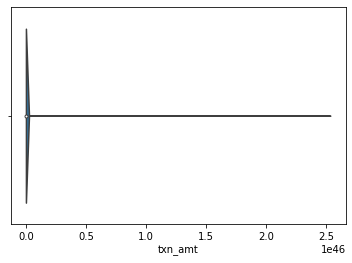

In [73]:
print(df["txn_amt"].describe())
sns.violinplot(x=df["txn_amt"])

In [74]:
df.sort_values(by="txn_amt", ascending=False).head(20)

,chid,shop_tag,txn_cnt,txn_amt,masts,educd,trdtp,naty,poscd,cuorg,gender_code,age,primary_card
20009231,10422345,39,144,2.533508e+46,1.0,4.0,14.0,1.0,1.0,30.0,0.0,4.0,1
19985707,10422345,39,37,5.086479e+25,1.0,4.0,14.0,1.0,1.0,30.0,0.0,4.0,1
19960725,10422345,39,86,1.068822e+22,1.0,4.0,14.0,1.0,1.0,30.0,0.0,4.0,1
3288529,10249166,10,22,5.477743e+20,2.0,6.0,15.0,1.0,99.0,30.0,0.0,4.0,1
2661293,10273376,10,193,3.306387e+16,2.0,3.0,5.0,1.0,99.0,30.0,1.0,4.0,1
3383569,10249166,10,18,2.836631e+16,2.0,6.0,15.0,1.0,99.0,30.0,0.0,4.0,1
52920,10175668,2,36,4.993529e+15,1.0,3.0,15.0,1.0,99.0,30.0,0.0,3.0,1
539517,10175668,2,26,7.336193e+13,1.0,3.0,15.0,1.0,99.0,30.0,0.0,3.0,1
19827217,10027163,39,38,1.984315e+10,2.0,3.0,14.0,1.0,2.0,30.0,1.0,3.0,1
430356,10495321,2,77,8.892166e+09,1.0,3.0,14.0,1.0,5.0,30.0,0.0,4.0,1


count    1.770446e+07
mean     8.967222e+00
std      6.495092e-01
min      3.107759e+00
25%      8.660953e+00
50%      9.000992e+00
75%      9.382728e+00
max      1.068485e+02
Name: txn_amt_log, dtype: float64


<AxesSubplot:xlabel='txn_amt_log'>

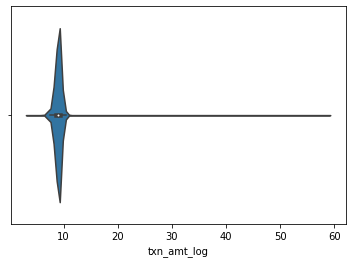

In [76]:
df["txn_amt_log"] = df["txn_amt"].apply(np.log)
print(df["txn_amt_log"].describe())
sns.violinplot(x=df["txn_amt_log"].drop([20009231]))

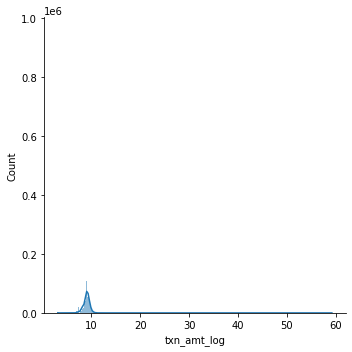

In [77]:
sns.displot(x=df["txn_amt_log"].drop([20009231]), kde=True)

In [78]:
df.sort_values(by="txn_amt_log", ascending=False).head(20)

,chid,shop_tag,txn_cnt,txn_amt,masts,educd,trdtp,naty,poscd,cuorg,gender_code,age,primary_card,txn_amt_log
20009231,10422345,39,144,2.533508e+46,1.0,4.0,14.0,1.0,1.0,30.0,0.0,4.0,1,106.848519
19985707,10422345,39,37,5.086479e+25,1.0,4.0,14.0,1.0,1.0,30.0,0.0,4.0,1,59.191213
19960725,10422345,39,86,1.068822e+22,1.0,4.0,14.0,1.0,1.0,30.0,0.0,4.0,1,50.723429
3288529,10249166,10,22,5.477743e+20,2.0,6.0,15.0,1.0,99.0,30.0,0.0,4.0,1,47.752395
2661293,10273376,10,193,3.306387e+16,2.0,3.0,5.0,1.0,99.0,30.0,1.0,4.0,1,38.037218
3383569,10249166,10,18,2.836631e+16,2.0,6.0,15.0,1.0,99.0,30.0,0.0,4.0,1,37.883978
52920,10175668,2,36,4.993529e+15,1.0,3.0,15.0,1.0,99.0,30.0,0.0,3.0,1,36.146919
539517,10175668,2,26,7.336193e+13,1.0,3.0,15.0,1.0,99.0,30.0,0.0,3.0,1,31.926426
19827217,10027163,39,38,1.984315e+10,2.0,3.0,14.0,1.0,2.0,30.0,1.0,3.0,1,23.711124
430356,10495321,2,77,8.892166e+09,1.0,3.0,14.0,1.0,5.0,30.0,0.0,4.0,1,22.908437


In [79]:
df["masts"].value_counts()

2.0    9378110
1.0    8315753
3.0      10593
Name: masts, dtype: int64

In [80]:
df["educd"].value_counts()

3.0    7684197
4.0    2843877
5.0    2679355
2.0    2430768
6.0    1866798
1.0     199454
Name: educd, dtype: int64

In [81]:
df["trdtp"].value_counts()

15.0    4381488
11.0    2358465
2.0     2105868
5.0     1951919
12.0    1677749
8.0      933415
17.0     840458
13.0     839584
10.0     538875
6.0      534075
14.0     491832
7.0      351289
4.0      271468
9.0      147441
19.0      76405
3.0       62368
20.0      34016
16.0      26645
21.0      16344
18.0      15669
27.0      12830
1.0       10406
22.0       9344
26.0       5302
23.0       5250
24.0       3023
25.0       2137
28.0        473
29.0         99
Name: trdtp, dtype: int64

In [82]:
df["naty"].value_counts()

1.0    17664430
2.0       40026
Name: naty, dtype: int64

In [83]:
df["poscd"].value_counts()

2.0     5994202
99.0    5830863
3.0     1891530
1.0     1759359
8.0      626862
4.0      564156
6.0      539108
5.0      415454
7.0       82644
10.0        277
9.0           1
Name: poscd, dtype: int64

In [84]:
df["cuorg"].value_counts()

30.0    17197148
6.0       143944
14.0       83166
4.0        48094
18.0       41747
32.0       26144
15.0       25846
24.0       19396
2.0        17795
17.0       12951
3.0        11292
19.0       11243
26.0       11105
13.0       10456
12.0        9052
8.0         8972
21.0        8111
7.0         5152
11.0        2347
25.0        2021
35.0        2010
31.0        1961
29.0        1507
27.0         725
20.0         672
16.0         483
22.0         439
28.0         220
23.0         201
38.0         146
5.0           53
9.0           28
40.0          15
1.0           14
Name: cuorg, dtype: int64

In [85]:
df["primary_card"].value_counts()

1    16189913
0     1514550
Name: primary_card, dtype: int64